# Captsone project for the IBM Data Science Professional Certificate 

(https://www.coursera.org/professional-certificates/ibm-data-science?#courses)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Hello, Capstone Project Course!")

Hello, Capstone Project Course!


In [2]:
!conda install -c anaconda seaborn -y
import seaborn as sb
print("Seaborn installed successfully!")

Solving environment: done

# All requested packages already installed.

Seaborn installed successfully!


In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
print("Shape:", df.shape)

Shape: (194673, 38)


In [5]:
# drop the column of PEDROWNOTGRNT due to missing 97.6% of values.
dfw = df.drop(['PEDROWNOTGRNT', 'INTKEY', 'INATTENTIONIND', 'SPEEDING', 'STATUS'], axis = 1)
# drop the rows containing NaN values for the following columns.
dfw.dropna(subset=['X', 'Y', 'ADDRTYPE', 'LOCATION', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLDESC', 'SDOTCOLNUM'], axis = 0, inplace = True)
# drop EXCEPTRSNCODE and EXCEPTRSNDESC columns as missing 96.46% and 99.99% of values respectively
dfw.drop(['EXCEPTRSNCODE', 'EXCEPTRSNDESC'], axis = 1, inplace = True)
dfw.shape

(109422, 31)

In [7]:
dfw1 = dfw.groupby(['WEATHER', 'SEVERITYCODE'])['SEVERITYCODE'].count()
dfw1

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1                  17
                          2                   7
Clear                     1               43589
                          2               20092
Fog/Smog/Smoke            1                 196
                          2                  87
Other                     1                 447
                          2                  65
Overcast                  1               11530
                          2                5271
Raining                   1               13022
                          2                6583
Severe Crosswind          1                   8
                          2                   3
Sleet/Hail/Freezing Rain  1                  67
                          2                  21
Snowing                   1                 488
                          2                 114
Unknown                   1                7313
                          2                 502
N

In [8]:
dfw.groupby('SEVERITYCODE')['SEVERITYCODE'].count()

SEVERITYCODE
1    76677
2    32745
Name: SEVERITYCODE, dtype: int64

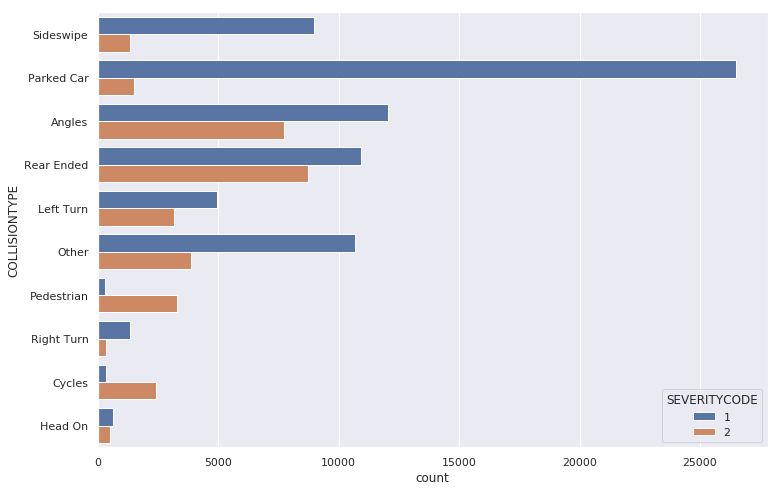

In [36]:
sb.set(rc={'figure.figsize':(12, 8)})
sb.countplot(y = "COLLISIONTYPE", hue = "SEVERITYCODE", data = dfw)

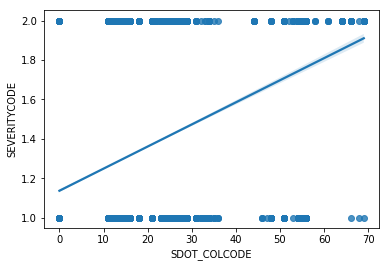

In [18]:
#plot independent variables vs dependent variable to find relationships
# sb.regplot(x = "SDOT_COLCODE", y = "SEVERITYCODE", data = dfw)

In [12]:
print("shape:", dfw.shape)
dfw.head(1)

shape: (109422, 31)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,ADDRTYPE,LOCATION,SEVERITYCODE.1,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
1,1,-122.347294,47.647172,2,52200,52200,2607959,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,...,0,Raining,Wet,Dark - Street Lights On,6354039.0,11,From same direction - both going straight - bo...,0,0,N


In [30]:
print("Unique", dfw['VEHCOUNT'].nunique())
print("labels:", dfw.VEHCOUNT.unique())

Unique 12
labels: [ 2  3  1  4  0  5  6  8 11  9  7 10]


In [33]:
# drop the following columns due to not using in model
df1 = dfw.drop(['X', 'Y', 'COLDETKEY', 'REPORTNO', 'LOCATION', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis = 1, inplace = True)
# drop the rows containing NaN values for the following columns.


KeyError: "['X' 'Y' 'COLDETKEY' 'REPORTNO' 'LOCATION' 'SDOTCOLNUM' 'SEGLANEKEY'\n 'CROSSWALKKEY' 'HITPARKEDCAR'] not found in axis"

In [34]:
df1.head()

AttributeError: 'NoneType' object has no attribute 'head'